# Master in Science in Data Analytics for Business - CA2

###  Data Preparation & Visualisation &  Machine Learning

**Student:** Wendy Paola Espinoza Potoy 
**ID:** 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

# Passenger Journeys by Public Transport Dublin Ireland dataset

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
passenger_journeys = pd.read_csv("passenger_journey.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [3]:
#Check the 5 first rows of the dataset
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


# Exploratory Data Analysis

In [4]:
#Check shape of the data in this case dataset has 1040 rows and 5 columns
passenger_journeys.shape

(1040, 5)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
passenger_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [6]:
#Check the measures of central tendency and measures of dispersion 
passenger_journeys.describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


In [7]:
#Check the unique values of each columns in the dataset.
passenger_journeys.nunique()

Statistic Label        1
Week                 260
Mode of Transport      4
UNIT                   1
VALUE                975
dtype: int64

In [8]:
#Check the data types of the dataset to see how many differents dtypes 
#exist and if is required to transform to a different one for further analysis. 
passenger_journeys.dtypes

Statistic Label       object
Week                  object
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

In [9]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
#51370 missing values were detected in "VALUE" column

passenger_journeys.isnull().sum()

Statistic Label       0
Week                  0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [10]:
#This function is used to returs the numbers of times that a value appear in a list in the dataset. 
# Counting missing values =16022 in "VALUE" column
passenger_journeys.count() 

Statistic Label      1040
Week                 1040
Mode of Transport    1040
UNIT                 1040
VALUE                 976
dtype: int64

In [11]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = passenger_journeys[passenger_journeys.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 5)


## Cleaning the data

Text(0.5, 1.0, 'Feature Statistics')

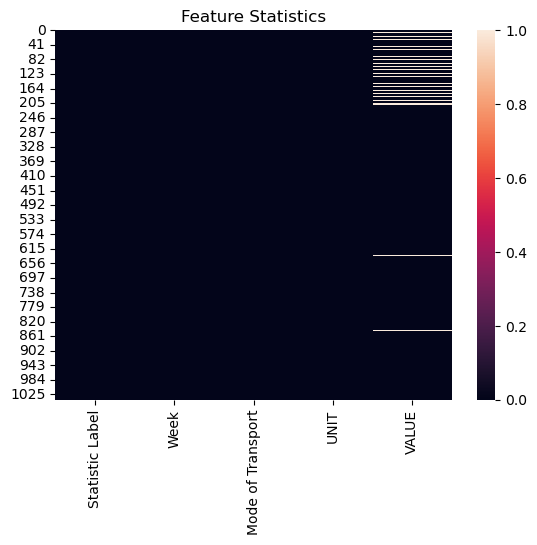

In [12]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(passenger_journeys.isnull())
plt.title("Feature Statistics")

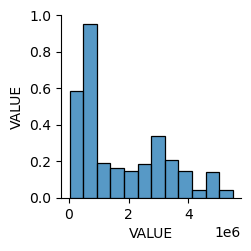

In [13]:
#Using a pairplot to check correlation
#However,there is not a good correlation between numerical variables. 
sns.pairplot(passenger_journeys)

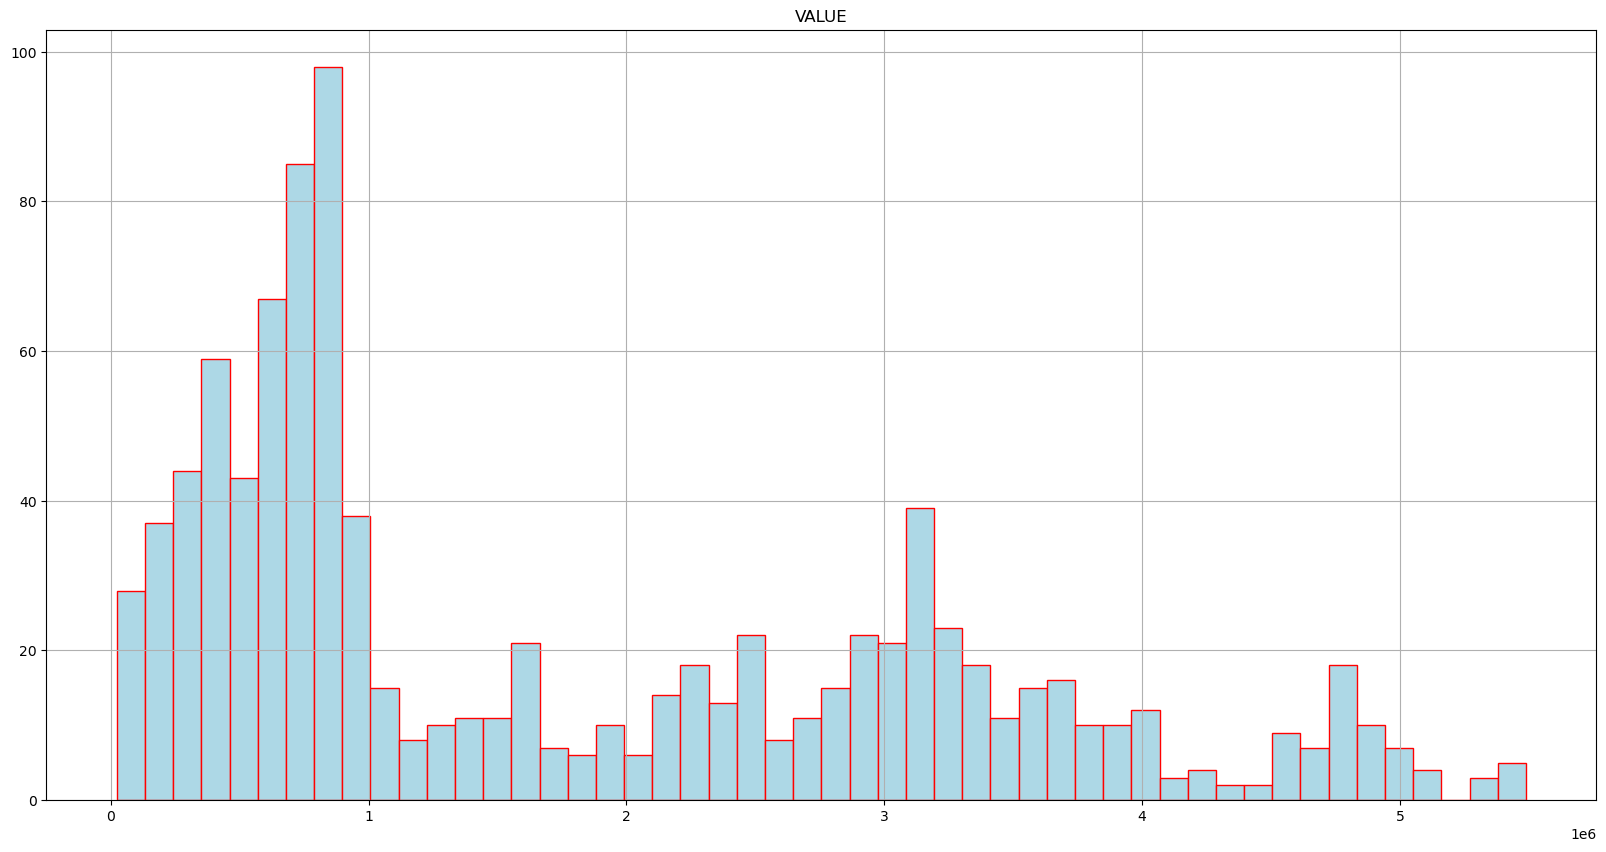

In [14]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Data Preparation

In [15]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'
passenger_journeys['Year'] = passenger_journeys['Week'].str[:4]

# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0,2019


In [16]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'

passenger_journeys['Week'] = passenger_journeys['Week'].str[5:]
# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


# Handling Missing values 

In [17]:
passenger_journeys['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(passenger_journeys['VALUE'].head(10)) 

0    1987891.0
1     497598.0
2    1491543.5
3    2485489.0
4    2709579.0
5     633764.0
6    1988553.5
7    3343343.0
8    2784678.0
9     678097.0
Name: VALUE, dtype: float64


In [18]:
#Checking null values
passenger_journeys.isnull().sum()

Statistic Label      0
Week                 0
Mode of Transport    0
UNIT                 0
VALUE                0
Year                 0
dtype: int64

In [19]:
#checking first 5 rows
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,1491543.5,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


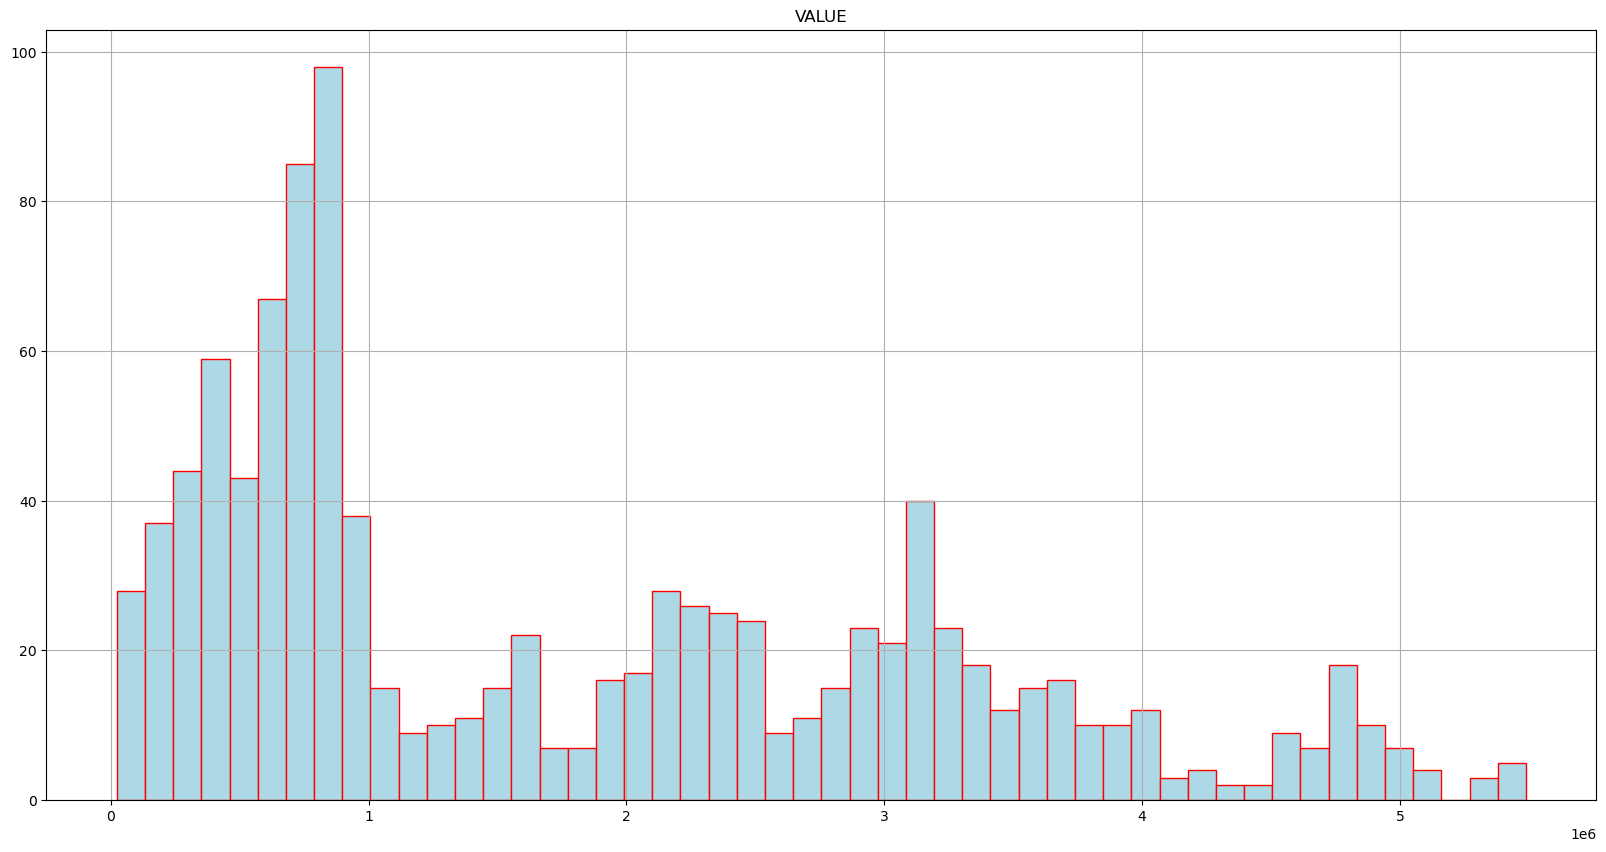

In [20]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Outliers

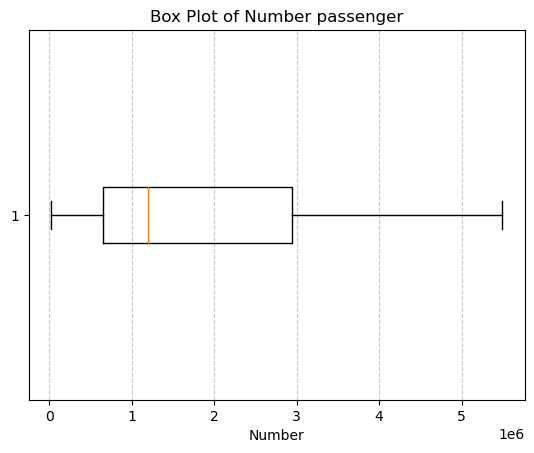

In [21]:
plt.boxplot(passenger_journeys['VALUE'], vert=False)
plt.title("Box Plot of Number passenger")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Data visualization

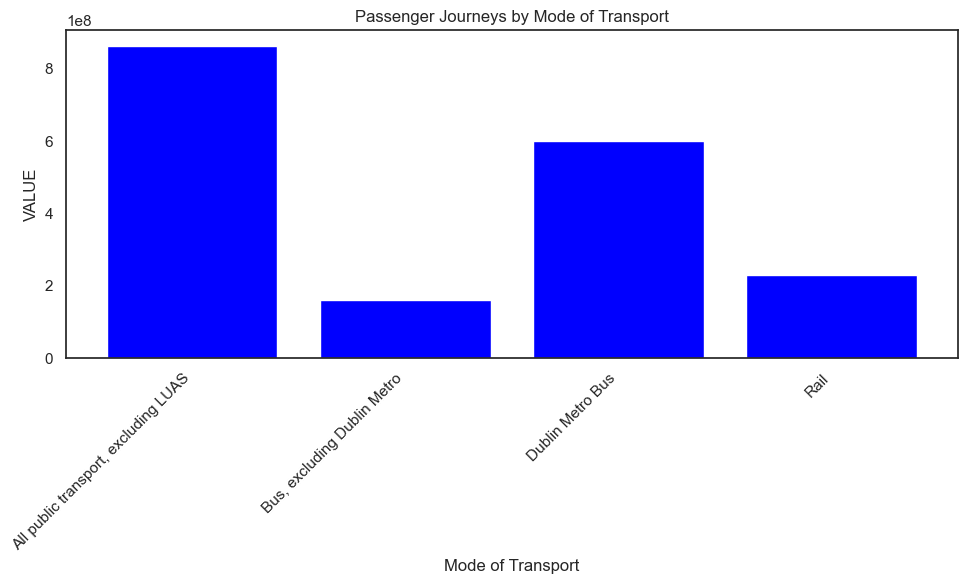

In [22]:
# Group by 'Age Range' and calculate the sum of 'VALUE_x' for each group
number_passenger_group = passenger_journeys.groupby('Mode of Transport')['VALUE'].sum().reset_index()


# Plotting
sns.set_theme(style="white", palette=None)
plt.figure(figsize=(10, 6))
plt.bar(number_passenger_group['Mode of Transport'], number_passenger_group['VALUE'], color='blue')
plt.xlabel('Mode of Transport')
plt.ylabel('VALUE')
plt.title('Passenger Journeys by Mode of Transport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

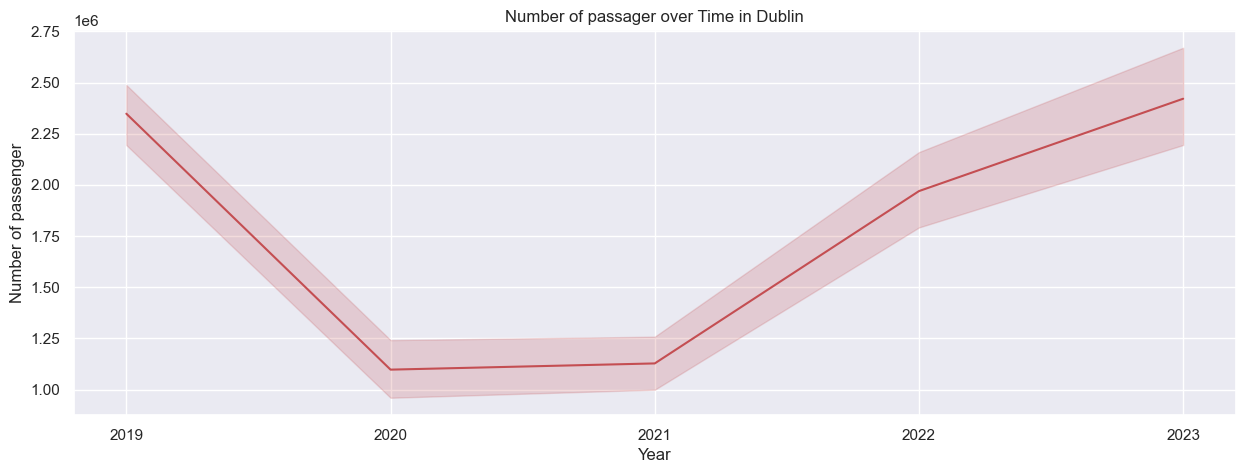

In [23]:
#Plotting a line plot to visualised Rate values over the time
sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Year", y="VALUE", color="r")
plt.title("Number of passager over Time in Dublin")
plt.xlabel("Year")
plt.ylabel("Number of passenger")
plt.grid(True)

# Show the plot
plt.show()

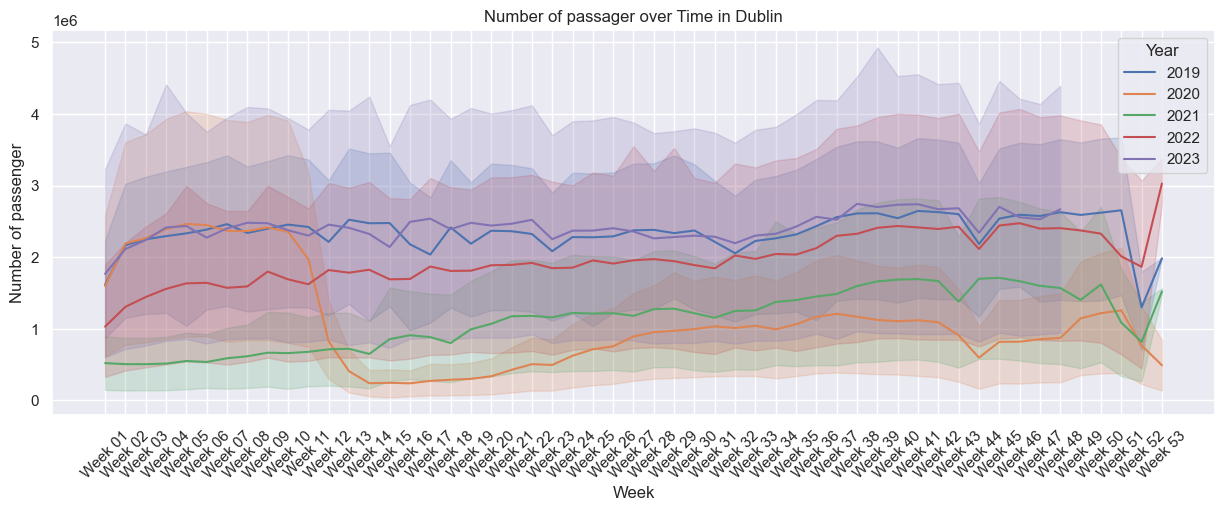

In [24]:
#Plotting a line plot to visualised Rate values over the time
#sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Week", y="VALUE", hue="Year")

plt.title("Number of passager over Time in Dublin")
plt.xlabel("Week")
plt.ylabel("Number of passenger")
#plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Time Series Clustering

Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster


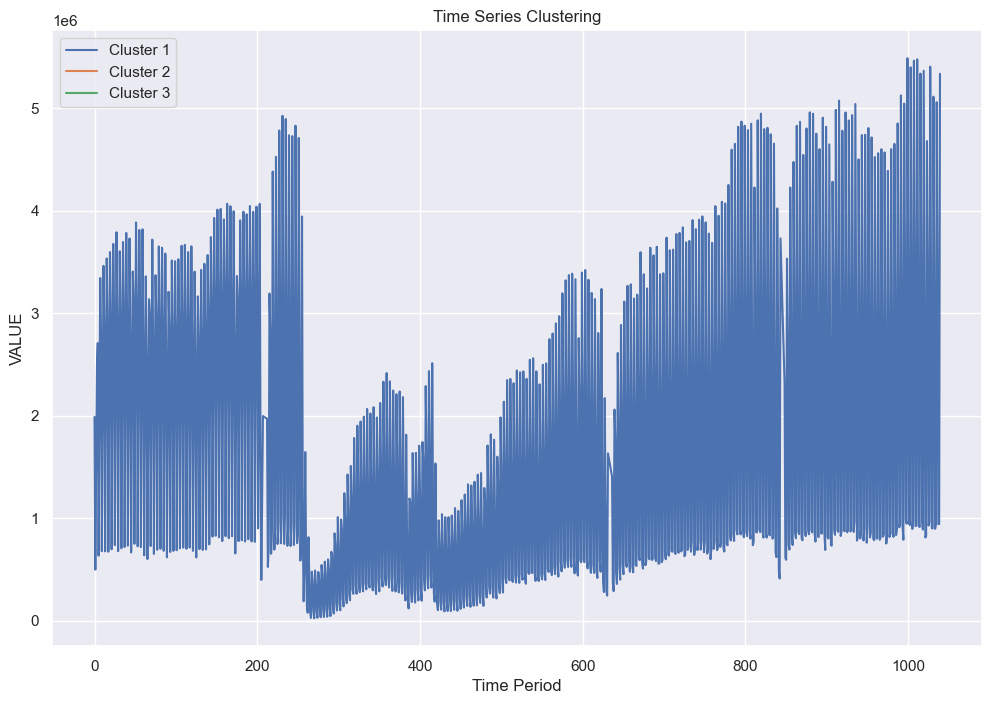

In [31]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'df'
# Filter the relevant columns
df_time_series = passenger_journeys[['VALUE']]

# Reshape the data for time series clustering
X = df_time_series.values.reshape((len(df_time_series), -1, 1))

# Scale the time series data
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)

# Apply Time Series K-Means clustering
n_clusters = 3
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_indices = (y_kmeans == i)
    plt.plot(X[cluster_indices].reshape(-1, X.shape[1]), label=f'Cluster {i + 1}')

plt.xlabel('Time Period')
plt.ylabel('VALUE')
plt.title('Time Series Clustering')
plt.legend()
plt.show()


In [44]:


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.eval_measures import rmse

# Assuming your dataset is stored in a variable called passenger_journeys
# Make sure the actual column name is used for 'your_column_name'

# Convert 'Year' to datetime format
passenger_journeys['Week'] = pd.to_datetime(passenger_journeys['Week'])

# Set 'Year' as the index
passenger_journeys.set_index('Week', inplace=True)

# Plot the time series data
passenger_journeys['VALUE'].plot(figsize=(12, 6), title='Passenger Journeys Over Time')
plt.show()

# Split the data into training and testing sets
train_size = int(len(passenger_journeys) * 0.8)
train, test = passenger_journeys[0:train_size], passenger_journeys[train_size:]

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(train['VALUE'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Make predictions
predictions = fit_model.forecast(len(test))

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train['VALUE'], label='Training Data')
plt.plot(test['VALUE'], label='Test Data')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.title('Exponential Smoothing Time Series Forecasting')
plt.legend()
plt.show()

# Evaluate the model
rmse_value = rmse(test['your_column_name'], predictions)
print(f'Root Mean Squared Error (RMSE): {rmse_value}')


DateParseError: Unknown datetime string format, unable to parse: Week 01, at position 0

## The Linear Regression using Time Series

In [ ]:
import statsmodels.api as sm

In [ ]:
# Print column names to check for existence of "Mode of Transport"
print(passenger_journeys.columns)


In [ ]:
# Filtering the DataFrame
metro_bus = passenger_journeys[
    (passenger_journeys["Mode of Transport"] == "Dublin Metro Bus")]

In [ ]:
metro_bus.head()

In [ ]:

# Selecting only the required columns
metro_bus = metro_bus[['Year', 'Week', 'VALUE']]

# Optionally, you can reset the index
metro_bus = metro_bus.reset_index(drop=True)

# Print or display the new DataFrame
metro_bus.head()

In [ ]:
# plot the dataset
ax = metro_bus.plot()
ax.set_ylabel('VALUE')
plt.show()

In [ ]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Public Transport Journeys by Type of Transport London UK

In [ ]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Type_of_Transport_london = pd.read_csv("tfl_journeys_type_london.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [ ]:
Type_of_Transport_london.head()

# Exploratory Data Analysis

In [ ]:
#Check the 5 first rows of the dataset
Type_of_Transport_london.shape

In [ ]:
Type_of_Transport_london.info()

In [ ]:
Type_of_Transport_london.describe()

In [ ]:
Type_of_Transport_london.nunique()

In [ ]:
Type_of_Transport_london.isnull().sum()

In [ ]:
Type_of_Transport_london.count()

In [ ]:
#This function will show if there is any rows or colums that containing duplicate data.
# This function will show if there are any rows or columns containing duplicate data.
duplicate_rows_df = Type_of_Transport_london[Type_of_Transport_london.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape[0])  # Use duplicate_rows_df.shape[0] to get the number of rows

In [ ]:
#sns.pairplot(Type_of_Transport_london, diag_kind="kde")
#plt.show()

In [ ]:
# Select specific columns for distribution plots
selected_columns = [ 'Days in period', 'Bus journeys (m)', 
                     'Underground journeys (m)', 'DLR Journeys (m)',
                     'Tram Journeys (m)', 'Overground Journeys (m)',
                     'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)']
# Set up subplots with two rows
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns) // 2 , figsize=(15, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Create distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(Type_of_Transport_london[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
# Convert 'Period beginning' and 'Period ending' columns to datetime
Type_of_Transport_london['Period beginning'] = pd.to_datetime(Type_of_Transport_london['Period beginning'])
Type_of_Transport_london['Period ending'] = pd.to_datetime(Type_of_Transport_london['Period ending'])

# Extract the year and create a new column
Type_of_Transport_london['Year'] = Type_of_Transport_london['Period ending'].dt.year
Type_of_Transport_london['Year'] = Type_of_Transport_london['Year'].astype(str).str[:4]

# Select data only for the years 2019, 2020, 2021, 2022, and 2023
selected_years = [2019, 2020, 2021, 2022, 2023]
Type_of_Transport_london = Type_of_Transport_london[
    (Type_of_Transport_london['Period beginning'].dt.year.isin(selected_years)) |
    (Type_of_Transport_london['Period ending'].dt.year.isin(selected_years))
]

# Print the filtered DataFrame
Type_of_Transport_london.head()

## Handling Missing values and cleaning data 

In [ ]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(Type_of_Transport_london.isnull())
plt.title("Feature Statistics")

In [ ]:
#Checking null values
Type_of_Transport_london.isnull().sum()

In [ ]:
Type_of_Transport_london.head()

In [ ]:
Type_of_Transport_london_melt = Type_of_Transport_london.melt(
    id_vars=["Year", "Period and Financial year", "Reporting Period", "Days in period", "Period beginning", "Period ending"],
    var_name="Mode of Transport",
    value_name="Value_in_millions"
)

Type_of_Transport_london_melt.head(10)

In [ ]:
#Plotting a line plot to visualised number of passenger (values) over the year

plt.figure(figsize=(15, 5))
sns.lineplot(data=Type_of_Transport_london_melt, x="Year", y="Value_in_millions", color="b")
plt.title("Number of passager over Time in London")
plt.xlabel("Year")
plt.ylabel("Number of passenger (Millions)")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#Plotting a line plot to visualised Rate values over the time
#sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=Type_of_Transport_london_melt, x="Reporting Period", y="Value_in_millions", hue="Year")

plt.title("Number of passager over Time in London")
plt.xlabel("Week")
plt.ylabel("Number of passenger")
#plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Group by 'Age Range' and calculate the sum of 'VALUE_x' for each group
number_passenger_group_london = Type_of_Transport_london_melt.groupby('Mode of Transport')['Value_in_millions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(number_passenger_group_london['Mode of Transport'], number_passenger_group_london['Value_in_millions'], color='r')
plt.xlabel('Mode of Transport')
plt.ylabel('Value_in_millions')
plt.title('Passenger Journeys by Mode of Transport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Outliers

In [ ]:
plt.boxplot(number_passenger_group_london['Value_in_millions'], vert=False)
plt.title("Box Plot of Number passenger")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [ ]:
#pip install tslearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset


# Convert 'Value_in_millions' to a time series format
time_series_data = Type_of_Transport_london_melt.groupby('Mode of Transport')['Value_in_millions'].apply(list).tolist()
X = to_time_series_dataset(time_series_data)

# Standardize the time series data
X = TimeSeriesScalerMeanVariance().fit_transform(X)

# Apply Dynamic Time Warping (DTW) K-Means clustering
n_clusters = 6 
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
y_pred = model.fit_predict(X)

# Add the cluster labels to your original DataFrame
Type_of_Transport_london_melt['Cluster'] = np.nan
for i, cluster_label in enumerate(y_pred):
    Type_of_Transport_london_melt.loc[Type_of_Transport_london_melt['Mode of Transport'] == time_series_data[i][0], 'Cluster'] = cluster_label

# Now, Type_of_Transport_london_melt contains a new column 'Cluster' with cluster labels
print(Type_of_Transport_london_melt[['Mode of Transport', 'Value_in_millions', 'Cluster']])


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df
# Extract relevant columns
data = Type_of_Transport_london_melt[['Value_in_millions']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
Type_of_Transport_london_melt['Cluster'] = kmeans.fit_predict(data)

# Display the result
print(Type_of_Transport_london_melt[['Year', 'Period and Financial year', 'Value_in_millions', 'Cluster']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Type_of_Transport_london_melt['Year'], y=Type_of_Transport_london_melt['Value_in_millions'], hue=Type_of_Transport_london_melt['Cluster'], palette='viridis', legend='full')
plt.title('K-means Clustering of Bus Journeys')
plt.xlabel('Year')
plt.ylabel('Value_in_millions')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your dataframe with the relevant columns

# Extract the feature for clustering
data = Type_of_Transport_london_melt[['Value_in_millions']]

# Perform hierarchical clustering
linked = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the relevant columns

# Extract features and target variable
X = Type_of_Transport_london_melt[['Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Days in period')
plt.ylabel('Value_in_millions')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the relevant columns

# Extract features and target variable
X = Type_of_Transport_london_melt[['Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Days in period')
plt.ylabel('Value_in_millions')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your time series dataset
# Assuming your dataset is stored in a variable called 'df'
# Ensure that 'Period ending' is in datetime format
Type_of_Transport_london_melt['Year'] = pd.to_datetime(Type_of_Transport_london_melt['Year'])
Type_of_Transport_london_melt.set_index('Year', inplace=True)

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(Type_of_Transport_london_melt['Value_in_millions'], label='Original Data')
plt.title('Time Series Data')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(Type_of_Transport_london_melt) * 0.8)
train, test = Type_of_Transport_london_melt[:train_size], Type_of_Transport_london_melt[train_size:]

# Fit ARIMA model
order = (5, 1, 2)  # You may need to adjust these parameters
model = ARIMA(train['Value_in_millions'], order=order)
fit_model = model.fit()

# Make predictions
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
rmse = sqrt(mean_squared_error(test['Value_in_millions'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train['Value_in_millions'], label='Training Data')
plt.plot(test['Value_in_millions'], label='Testing Data')
plt.plot(predictions, label='Predictions', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.legend()
plt.show()


In [ ]:
#pip install tslearn matplotlib


## Time Series Clustering

In [ ]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'df'
# Filter the relevant columns
df_time_series = Type_of_Transport_london_melt[['Value_in_millions']]

# Reshape the data for time series clustering
X = df_time_series.values.reshape((len(df_time_series), -1, 1))

# Scale the time series data
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)

# Apply Time Series K-Means clustering
n_clusters = 3
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_indices = (y_kmeans == i)
    plt.plot(X[cluster_indices].reshape(-1, X.shape[1]), label=f'Cluster {i + 1}')

plt.xlabel('Time Period')
plt.ylabel('Value_in_millions')
plt.title('Time Series Clustering')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming 'y_kmeans' contains your cluster labels
unique_labels = np.unique(y_kmeans)

# Check if there are more than one unique cluster labels
if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(X_scaled.reshape(len(df_time_series), -1), y_kmeans)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Not enough unique cluster labels for silhouette score calculation.")


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax

try:
    # Your clustering code here
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)

except ValueError as e:
    if "Resumed because of empty cluster" in str(e):
        # Handle the empty cluster situation (e.g., retry with different parameters)
        print("Empty cluster encountered. Try adjusting parameters.")
    else:
        # Re-raise the exception if it's not related to empty clusters
        raise
